# Graph 2 : A Simple Graph with Multiple State Attributes

In [2]:
# imports
from langgraph.graph import StateGraph 
from typing import TypedDict, List

In [3]:
# Schema for the state
class AgentState(TypedDict):
    nums: List[int]
    name: str
    result: int

In [4]:
# Node Function
def process_numbers(state: AgentState) -> AgentState:
    """
    Process the numbers in the state and return the sum.
    """
    state['result'] = f"Hello {state['name']}, the sum of your numbers is {sum(state['nums'])}."
    return state

In [5]:
# Initialize the state graph
agent_graph = StateGraph(AgentState)
agent_graph.add_node("processor", process_numbers)
agent_graph.set_entry_point("processor")
agent_graph.set_finish_point("processor")
app = agent_graph.compile()

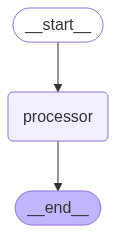

In [6]:
# Visualize the graph
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [7]:
# Run / Invoke
result = app.invoke(
    {
        "nums": [1, 2, 3, 4, 5],
        "name": "Muskan",
    }
)

In [8]:
print(result)
print(result['result'])  # Output the result

{'nums': [1, 2, 3, 4, 5], 'name': 'Muskan', 'result': 'Hello Muskan, the sum of your numbers is 15.'}
Hello Muskan, the sum of your numbers is 15.


## Exercise: Create a simple graph with multiple state attributes that do operations like addition and multiplication
- State attributes: `name`, `nums`, `operation`, `result`


In [10]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [12]:
# State Schema
class AgentState2(TypedDict):
    name: str
    nums: List[int]
    operation: str
    result: str

In [13]:
# Node Function
def perform_operation(state: AgentState2) -> AgentState2:
    """
    Perform the specified operation on the numbers in the state.
    """
    if state['operation'] == '+':
        state['result'] = f"Hello {state['name']}, the sum of your numbers is {sum(state['nums'])}."
    elif state['operation'] == '*':
        product = 1
        for num in state['nums']:
            product *= num
        state['result'] = f"Hello {state['name']}, the product of your numbers is {product}."
    else:
        state['result'] = f"Hello {state['name']}, the operation '{state['operation']}' is not supported. Please use '+' or '*'."
    return state

In [14]:
graph = StateGraph(AgentState2)
graph.add_node("operation_handler", perform_operation)
graph.set_entry_point("operation_handler")
graph.set_finish_point("operation_handler")
app2 = graph.compile()

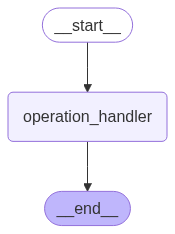

In [16]:
from IPython.display import display, Image
display(Image(app2.get_graph().draw_mermaid_png()))

In [17]:
result2 = app2.invoke(
    {
        "name": "Muskan",
        "nums": [1, 2, 3, 4, 5],
        "operation": '+',
    }
)
print(result2['result'])  # Output the result for addition

Hello Muskan, the sum of your numbers is 15.


In [18]:
result2 = app2.invoke(
    {
        "name": "Muskan",
        "nums": [1, 2, 3, 4, 5],
        "operation": '*',
    }
)
print(result2['result'])  # Output the result for multiplication

Hello Muskan, the product of your numbers is 120.
